# Pre-Outlier Removal Modelling

This notebook includes all non-neural network models before outlier removal via IQR.

Models included in this notebook:
- Linear Regression
- Random Forest Regressor

In [1]:
# Fundamentals
import numpy as np
import seaborn as sns
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

**Load in Data**

In [2]:
# Load in all datasets before outlier removal
X_train = pd.read_csv('data/clean_X_train.csv')
y_train = pd.read_csv('data/clean_y_train.csv')
X_test = pd.read_csv('data/clean_X_test.csv')
y_test = pd.read_csv('data/clean_y_test.csv')

### Machine Learning Models

#### Random Search CV

In [97]:
# Create a random search cv for LinearRegression, RandomForestRegressor

# Instantiate a pipe for the RandomSearchCV
random_estimators = [('scaler', MinMaxScaler()), 
                     ('dimensionality_reduction', PCA()), 
                     ('model', LinearRegression())]

random_pipe = Pipeline(random_estimators)

# Set Random Search Parameters 
random_grid_LR = {'scaler': [StandardScaler(), MinMaxScaler(), None],
                  'dimensionality_reduction__n_components': [20,40,60,80,100,120,140,160,180,200],
                  'model': [LinearRegression()]}

random_grid_RFR = {'scaler': [StandardScaler(), MinMaxScaler(), None],
                   'dimensionality_reduction__n_components': [20,40,60,80,100,120,140,160,180,200],
                   'model': [RandomForestRegressor(random_state=1)],
                   'model__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
                   'model__max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}

random_grid = [random_grid_LR, random_grid_RFR]

# Instantiate the Random Search CV
randomsearch = RandomizedSearchCV(random_pipe, random_grid, cv=10)

# Fit onto train data
fitted_random_grid = randomsearch.fit(X_train, y_train)

In [98]:
# Check what the best model is
fitted_random_grid.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimensionality_reduction', PCA(n_components=120)),
                ('model',
                 RandomForestRegressor(max_depth=45, n_estimators=200,
                                       random_state=1))])

In [101]:
# Get the R2 score from the best model
print(fitted_random_grid.score(X_train, y_train))
print(fitted_random_grid.score(X_test, y_test))

0.8790752575416274
-0.011333051508370051


In [115]:
# Take a look at the results
fitted_random_grid.cv_results_

{'mean_fit_time': array([251.69844379, 161.03839884,  23.37127271, 172.51989448,
         35.8491971 ,  13.58443317,  28.64922354,  71.04781899,
         21.78846052,  39.75605907]),
 'std_fit_time': array([5.08897853, 3.79610464, 0.59079676, 4.54995487, 0.70408275,
        0.14171129, 0.26774481, 1.03676124, 0.35297519, 0.51026854]),
 'mean_score_time': array([0.30796695, 0.22729537, 0.0229584 , 0.17744789, 0.02515392,
        0.04664037, 0.10912929, 0.02784247, 0.02739525, 0.03729029]),
 'std_score_time': array([0.22220502, 0.18100743, 0.00614706, 0.09237175, 0.00422878,
        0.00531102, 0.07540545, 0.0042787 , 0.00333349, 0.0024383 ]),
 'param_scaler': masked_array(data=[MinMaxScaler(), StandardScaler(), MinMaxScaler(),
                    StandardScaler(), None, None, StandardScaler(),
                    MinMaxScaler(), MinMaxScaler(), MinMaxScaler()],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_val

**TODO:**
- Explain the results from what I found
    - Obviously overfit as the $R^2$ score for the train data is 0.88 while the test data is -0.01
- I will continue on with Random Search CV for RandomForestRegressor again
    - Use scores from above to fit best model
    - Very unlikely that LinearRegression will be a good model, as my data includes text data

In [108]:
# Rerun random search for RandomForestRegressor after adjusting from previous random search

grid_RFR = {'scaler': [MinMaxScaler()],
            'dimensionality_reduction__n_components': [110, 115, 120, 125, 130],
            'model': [RandomForestRegressor(random_state=1)],
            'model__n_estimators': [200, 250, 300, 350, 400, 450, 500],
            'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Instantiate the grid search (reusing the random pipe will not affect the result)
randomsearch_RFR = RandomizedSearchCV(random_pipe, grid_RFR, cv=10, n_jobs=-1, verbose=2)

# Fit onto train data
fitted_random_grid_RFR = randomsearch_RFR.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 44.7min finished


In [109]:
# Check what the best model is
fitted_random_grid_RFR.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimensionality_reduction', PCA(n_components=120)),
                ('model',
                 RandomForestRegressor(max_depth=9, n_estimators=500,
                                       random_state=1))])

In [111]:
# Get the R2 score from the best model
print(fitted_random_grid_RFR.score(X_train, y_train))
print(fitted_random_grid_RFR.score(X_test, y_test))

0.7903203921332767
-0.02500595291698615


In [113]:
# Take a look at the results
fitted_random_grid_RFR.cv_results_

{'mean_fit_time': array([ 62.6493731 , 427.32113829, 148.23451424, 150.96221004,
        251.28221581, 576.30477791, 195.30399938,  83.47124813,
        105.46304569, 104.61672292]),
 'std_fit_time': array([ 0.82993041,  3.59394316,  1.58450541,  1.66540141,  2.04006027,
         4.95788374,  3.93584342,  0.32601199,  4.98032539, 19.60179866]),
 'mean_score_time': array([0.06336133, 0.22010009, 0.06102817, 0.07811451, 0.08330061,
        0.14530172, 0.08650036, 0.05071614, 0.12551825, 0.04800966]),
 'std_score_time': array([0.01698976, 0.08905075, 0.00484485, 0.00648307, 0.0057737 ,
        0.01400683, 0.00387725, 0.00216488, 0.03195366, 0.01411548]),
 'param_scaler': masked_array(data=[MinMaxScaler(), MinMaxScaler(), MinMaxScaler(),
                    MinMaxScaler(), MinMaxScaler(), MinMaxScaler(),
                    MinMaxScaler(), MinMaxScaler(), MinMaxScaler(),
                    MinMaxScaler()],
              mask=[False, False, False, False, False, False, False, False,
       

I can see that both of the results of the random searches choose the highest possible values tested for `max_depth` and `n_estimators` as the best model parameters, while the `n_components` for PCA stayed the same. In terms of the `max_depth`, a reduction from 45 to 9 dropped the $ R^2 $ train score by ~0.09, while insignificantly affecting the test score. Thus, I will need to manually tune the `max_depth` and `n_estimators` parameters to get the best `RandomForestRegressor` model using Cross Validation.

#### Cross Validation

##### Random Forest Regressor

In [117]:
# Find the cross validation scores to find optimal max_depth
# Create list for cross val scores and max_depths
RFR_cross_val_scores = []
max_depths = range(1, 51)

# Use for loop on pipeline to get cross val scores
for depth in max_depths:
    RFR_estimators = [('normalise', MinMaxScaler()),
                  ('reduce_dim', PCA(n_components=120)),
                  ('RFR', RandomForestRegressor(max_depth=depth, random_state=1))]
    RFR_pipe = Pipeline(RFR_estimators)
    
    # Get average cross validation score for each depth and append to the list of scores
    cv_score = cross_val_score(RFR_pipe, X_train, y_train, cv=5, n_jobs=-1)
    mean_cv_score = np.mean(cv_score)
    
    RFR_cross_val_scores.append(mean_cv_score)
    
    print(depth, end='\r')

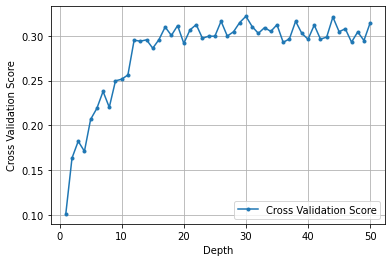

In [118]:
# Take a look at the cross validation scores
plt.figure()
plt.plot(max_depths, RFR_cross_val_scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

In [125]:
# Get R2 score based on findings above
RFR_estimators2 = [('normalise', MinMaxScaler()),
                  ('reduce_dim', PCA(n_components=120)),
                  ('RFR', RandomForestRegressor(max_depth=30,
                                                random_state=1))]

RFR_pipe2 = Pipeline(RFR_estimators2)
RFR_pipe2.fit(X_train, y_train)
RFR_pipe2.score(X_test, y_test)

-0.001333080414895882

**TODO: Run again with the best max depth for n_estimators**

Best max depth looks like 30, although I could have just as easily chosen 17 as the value is only marginally better, but is likely less overfit to the training data.

In [120]:
# Find the cross validation scores to find optimal max_depth
# Create list for cross val scores and n_estimators
RFR_cross_val_scores1 = []
num_estimators = range(1, 501, 20)

# Use for loop on pipeline to get cross val scores
for estimators in num_estimators:
    RFR_estimators = [('normalise', MinMaxScaler()),
                      ('reduce_dim', PCA(n_components=120)),
                      ('RFR', RandomForestRegressor(max_depth=30, 
                                                    n_estimators=estimators,
                                                    random_state=1))]
    RFR_pipe = Pipeline(RFR_estimators)
    
    # Get average cross validation score for each depth and append to the list of scores
    cv_score = cross_val_score(RFR_pipe, X_train, y_train, cv=5, n_jobs=-1)
    mean_cv_score = np.mean(cv_score)
    
    RFR_cross_val_scores1.append(mean_cv_score)
    
    print(estimators, end='\r')

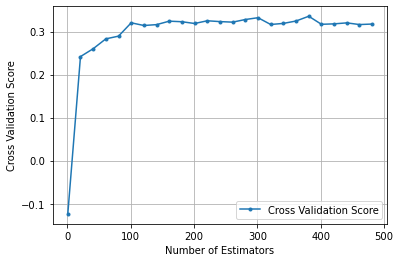

In [122]:
# Check for the optimal number of estimators
plt.figure()
plt.plot(num_estimators, RFR_cross_val_scores1, label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

In [154]:
# Use the hyperparameters found above as the "best possible model"
RFR_estimators3 = [('normalise', MinMaxScaler()),
                   ('reduce_dim', PCA(n_components=120)),
                   ('RFR', RandomForestRegressor(max_depth=30, n_estimators=380, random_state=1))]

RFR_pipe3 = Pipeline(RFR_estimators3)
RFR_pipe3.fit(X_train, y_train)
RFR_pipe3.score(X_test, y_test)

-0.0007380022998586533

I can see above that the optimal `n_estimators` is at ~380, although the default value of 100 generates a cross validation score that is only marginally less. However, just like the previous score after optimizing the `max_depth`, my test $R^2$ score remains at a poor value suggesting this model does not predict the listing price.

As Random Forest Regression was not able to predict the test data very well, I will take a look at the other models that was used in the `RandomSearchCV` to compare to this `RandomForestRegressor`. Let's begin by taking a look at PCA to determine how many principal components is actually needed to explain the majority of the variance in my data.

#### PCA

PCA is used to reduce the features of my model and control the noise in my data. My assumptions are that PCA will improve model performance across all of the models.

In [155]:
# Scale the data
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X_train)

# Transform the X_train data
scaled_X_train = minmaxscaler.transform(X_train)
scaled_X_test = minmaxscaler.transform(X_test)

In [158]:
# Fit a PCA model with train data
pca = PCA(n_components=200)
pca.fit(scaled_X_train)

pca_X_train = pca.transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)

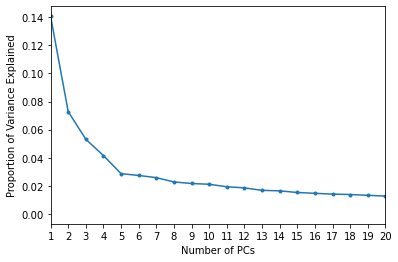

In [152]:
# Get the explained variance ratio and plot the data points
pca_expl_var_ratio = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(1,201), pca_expl_var_ratio, marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,201,1))
plt.xlim(1, 20)
plt.show()

Looking at the plot above, I can see that 5 `n_components` are enough to explain > 97% of the varaiance in my data using the **elbow method**. Thus, I will take a look at the linear regression once again with and without dimension reduction.

**Note:** I will continue the rest of the modelling using the scaled data as most of the features are encoded and I can keep all of the values in the same ranges.

#### Linear Regression

I assume that this model will perform very poorly as the listing `price` is unlikely to be separated by a linear boundary (little to no visible correlation in the scatterplots from EDA section). Let's fit the model just to take a look.

In [157]:
# Fit linear regression model
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(scaled_X_train, y_train)

# Score on the train and test data
print(f'Score on the train set: {linear_reg.score(scaled_X_train, y_train)}')
print(f'Score on the test set: {linear_reg.score(scaled_X_test, y_test)}')

Score on the train set: 0.15864190610100948
Score on the test set: -7.783900270873203e+16


I can see that the model has performed extremely poorly as expected. Let's use the PCA transformed data and see if that changes the results.

In [159]:
# Fit linear regression model
pca_linear_reg = LinearRegression(n_jobs=-1)
pca_linear_reg.fit(pca_X_train, y_train)

# Score on the train and test data
print(f'Score on the train set: {pca_linear_reg.score(pca_X_train, y_train)}')
print(f'Score on the test set: {pca_linear_reg.score(pca_X_test, y_test)}')

Score on the train set: 0.15672850597300347
Score on the test set: 0.10313745259771101


Wow, a major difference can be seen in the results as the train score is now significantly closer to that of the train score. While these results are nothing to be excited about, this indicates that my data had a lot of noise which resulted in a poor $R^2$ test score.